In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.io import arff
import plotly.express as px
plt.style.use('ggplot')
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# Loading the test and train data sets into pandas dataframes

In [4]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Test.csv')

In [5]:
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [6]:
test.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [7]:
#train info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [8]:
#test info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1601 non-null   object 
 1   country                1601 non-null   object 
 2   age_group              1601 non-null   object 
 3   travel_with            1274 non-null   object 
 4   total_female           1600 non-null   float64
 5   total_male             1599 non-null   float64
 6   purpose                1601 non-null   object 
 7   main_activity          1601 non-null   object 
 8   info_source            1601 non-null   object 
 9   tour_arrangement       1601 non-null   object 
 10  package_transport_int  1601 non-null   object 
 11  package_accomodation   1601 non-null   object 
 12  package_food           1601 non-null   object 
 13  package_transport_tz   1601 non-null   object 
 14  package_sightseeing    1601 non-null   object 
 15  pack

In [9]:
#train null values
train.isna().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [10]:
#test null values
test.isna().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

# Visualizing missing values

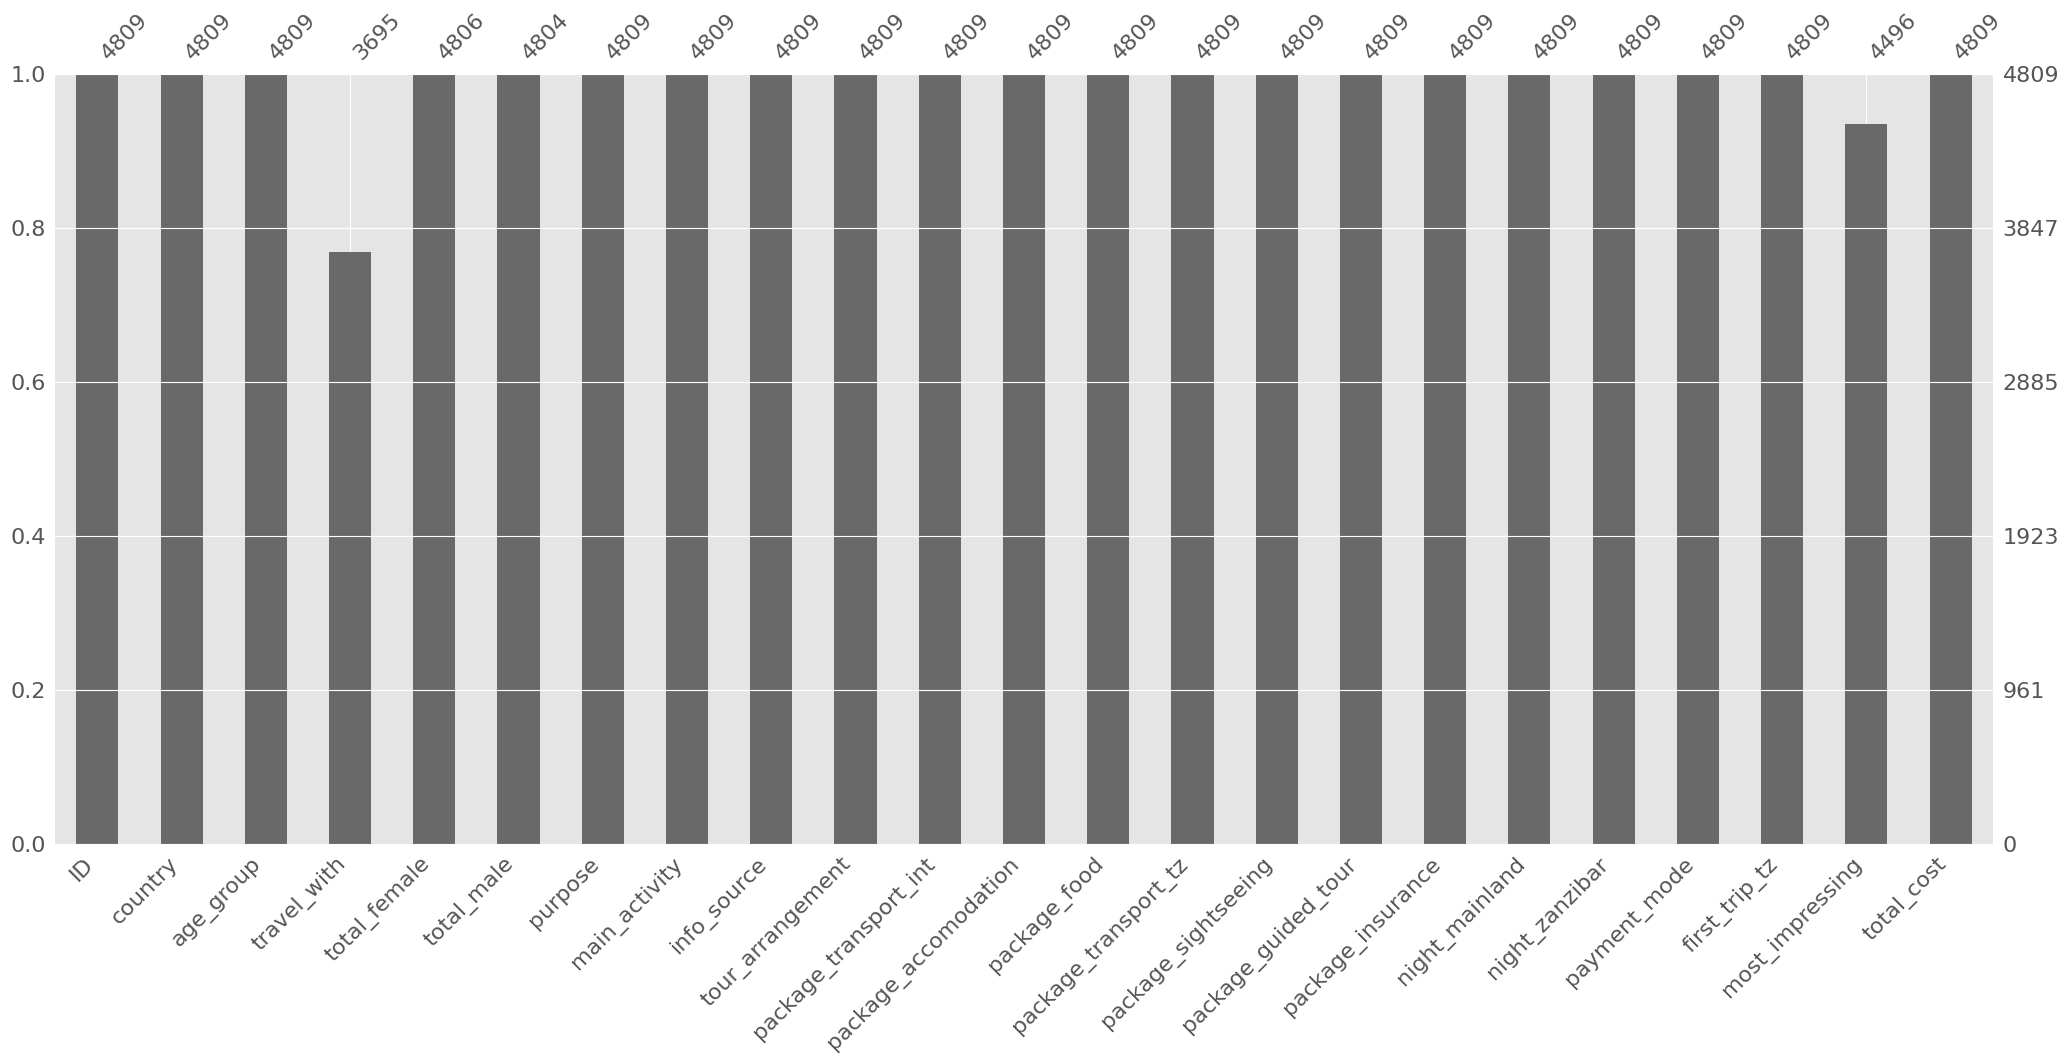

In [11]:
import missingno as msno

#train data
msno.bar(train)
plt.show()

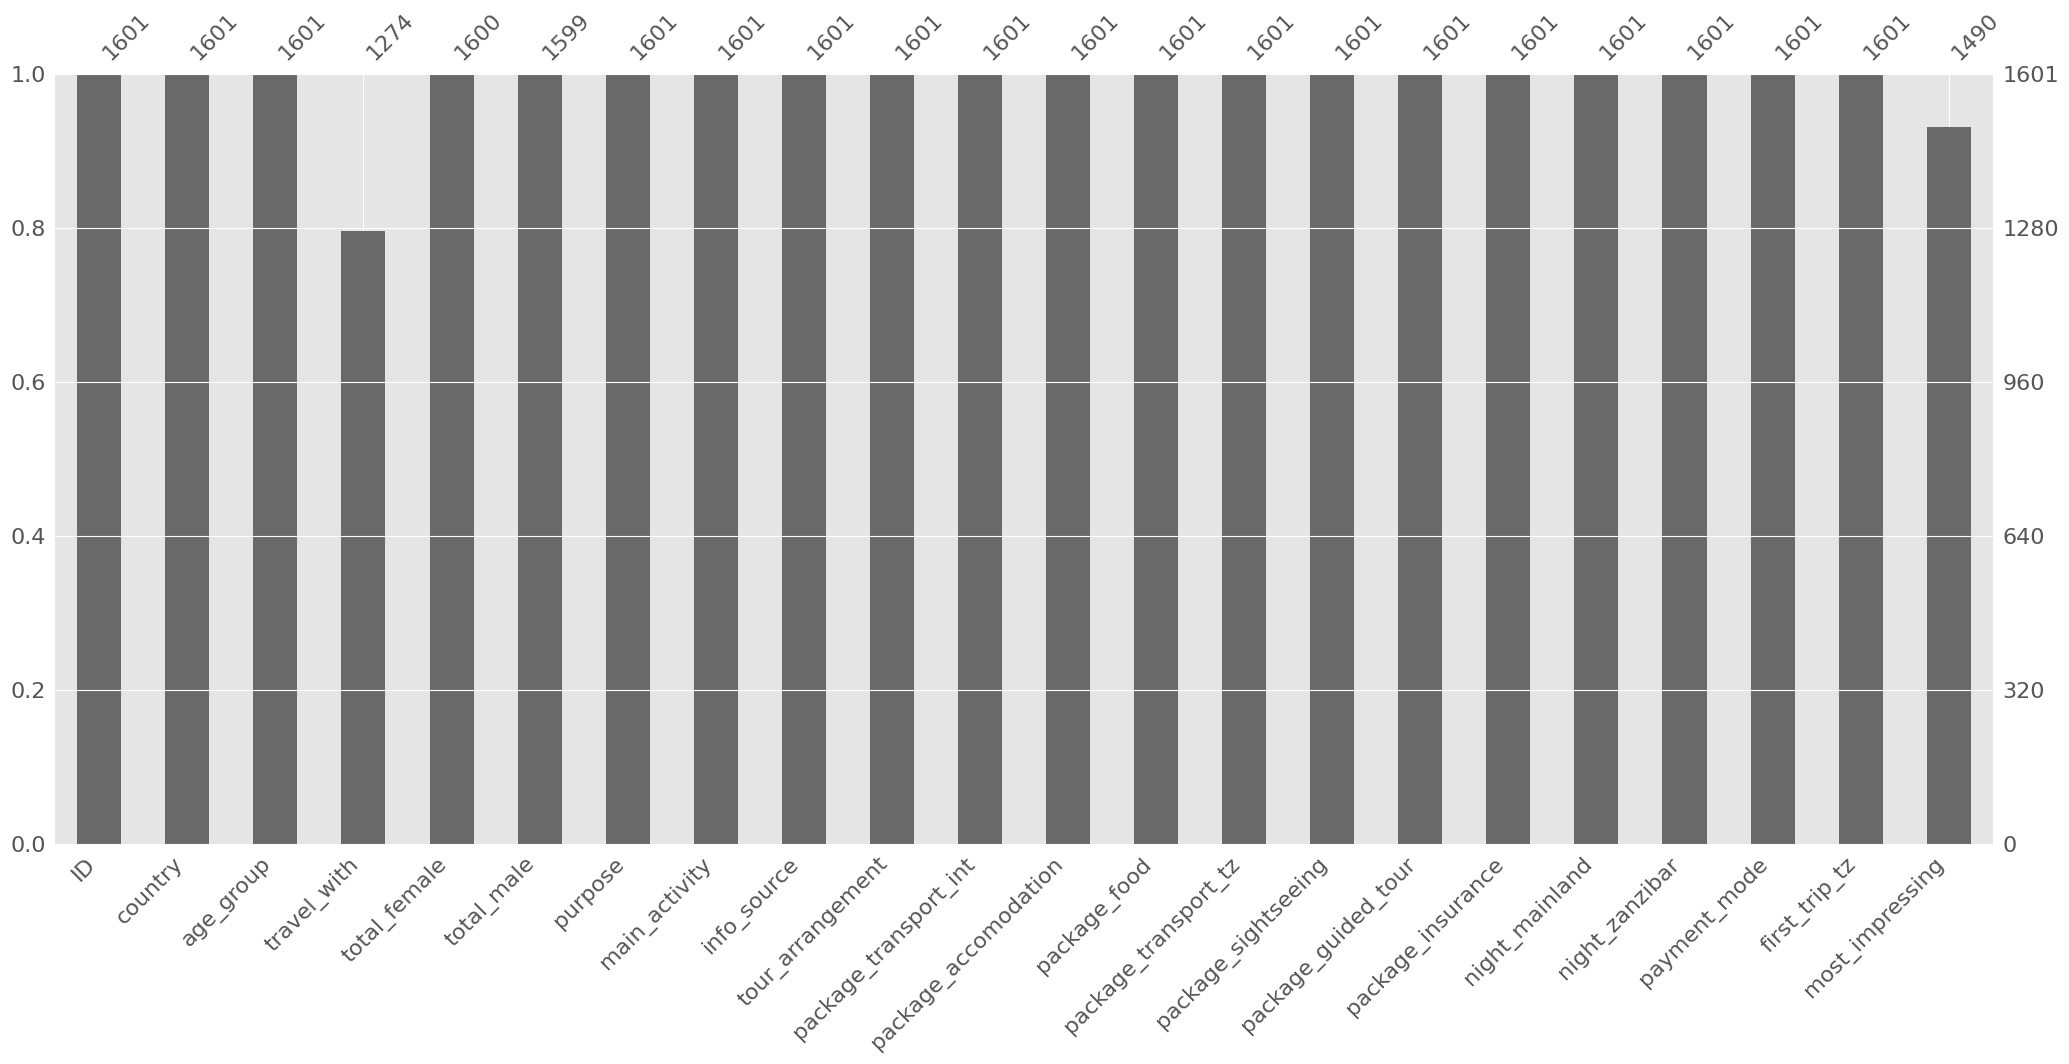

In [12]:
#test

msno.bar(test)
plt.show()

# Handling Missing values

First I dropped the colums with significant amount of missing values. These are 'travel_with' column and 'most_impressing'

In [13]:
#train set

to_drop = ['most_impressing','ID','country','travel_with']
train.drop(to_drop, inplace = True, axis = 1)

#test set

test.drop(to_drop, inplace = True, axis = 1)


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age_group              1601 non-null   object 
 1   total_female           1600 non-null   float64
 2   total_male             1599 non-null   float64
 3   purpose                1601 non-null   object 
 4   main_activity          1601 non-null   object 
 5   info_source            1601 non-null   object 
 6   tour_arrangement       1601 non-null   object 
 7   package_transport_int  1601 non-null   object 
 8   package_accomodation   1601 non-null   object 
 9   package_food           1601 non-null   object 
 10  package_transport_tz   1601 non-null   object 
 11  package_sightseeing    1601 non-null   object 
 12  package_guided_tour    1601 non-null   object 
 13  package_insurance      1601 non-null   object 
 14  night_mainland         1601 non-null   int64  
 15  nigh

I now fill the missing values in the 'total_male' and 'total_female' columns with the mean.

In [15]:
#train set

train['total_male'] = train['total_male'].fillna(train['total_male'].mean())
train['total_female'] = train['total_male'].fillna(train['total_female'].mean())

#test set

test['total_male'] = test['total_male'].fillna(test['total_male'].mean())
test['total_female'] = test['total_female'].fillna(test['total_female'].mean())


In [16]:
train.isna().sum()

age_group                0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
total_cost               0
dtype: int64

In [17]:
test.isna().sum()

age_group                0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
dtype: int64

Checking for unique values

In [18]:
train.nunique()

age_group                   4
total_female               15
total_male                 15
purpose                     7
main_activity               9
info_source                 8
tour_arrangement            2
package_transport_int       2
package_accomodation        2
package_food                2
package_transport_tz        2
package_sightseeing         2
package_guided_tour         2
package_insurance           2
night_mainland             64
night_zanzibar             34
payment_mode                4
first_trip_tz               2
total_cost               1637
dtype: int64

# Checking for multicollinearity

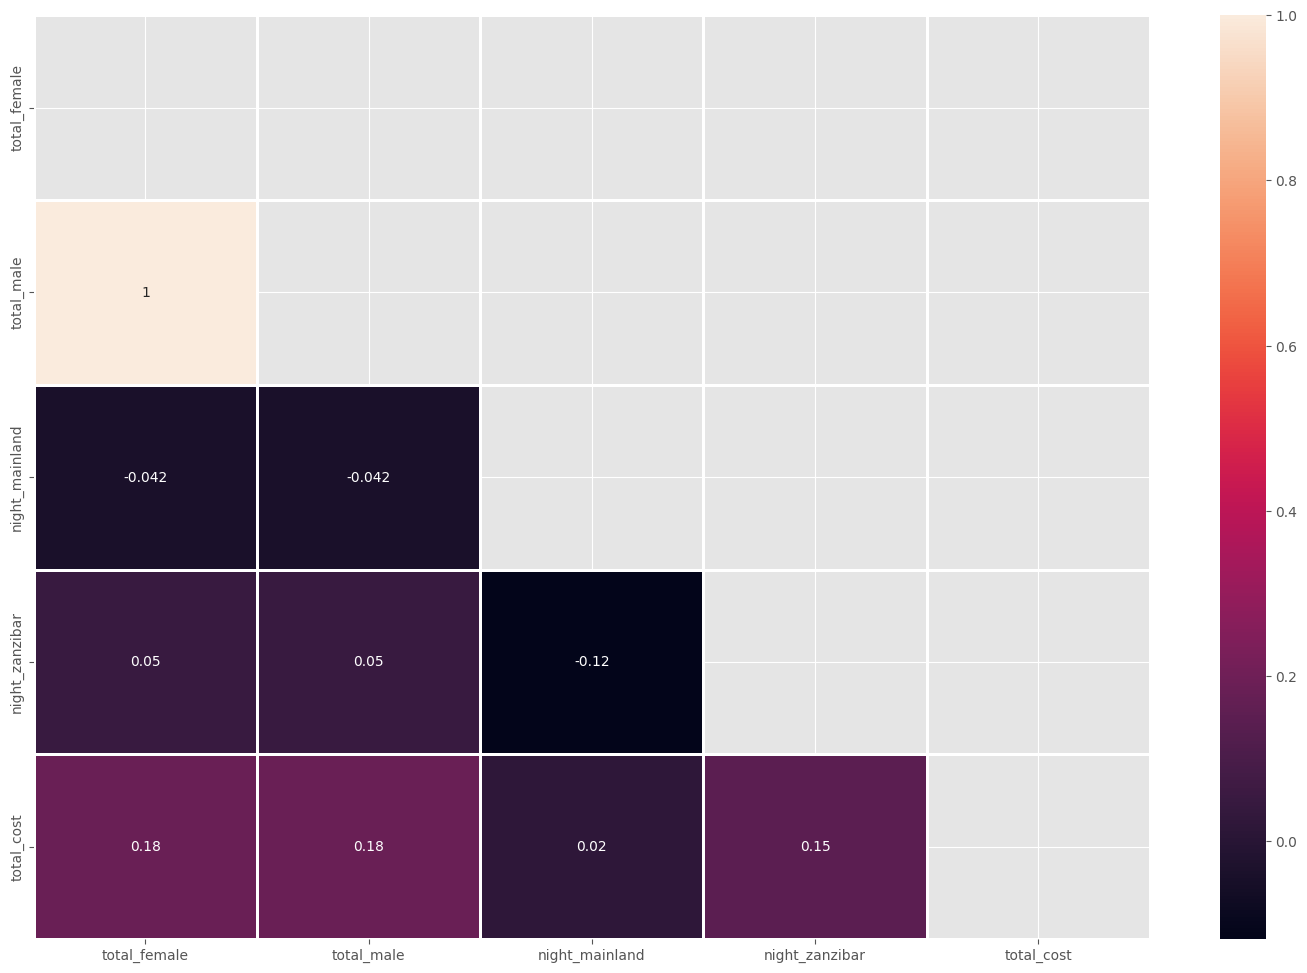

In [19]:
plt.figure(figsize = (18, 12))

corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

## Adding total male and total female columns to get total tourists

In [20]:
train['total_tourists'] = train['total_female'] + train['total_male']

In [21]:
test['total_tourists'] = test['total_female'] + test['total_male']

since the 'total_male' and 'totatl_female' variables have a high collinearity we will drop them

In [22]:
train.drop(columns = ['total_male', 'total_female', 'info_source'], inplace = True, axis = 1)

In [23]:
test.drop(columns = ['total_male', 'total_female', 'info_source'], inplace = True, axis = 1)

In [24]:
train.head()

,age_group,purpose,main_activity,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,total_tourists
0,45-64,Leisure and Holidays,Wildlife tourism,Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,674602.5,2.0
1,25-44,Leisure and Holidays,Cultural tourism,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,3214906.5,0.0
2,25-44,Visiting Friends and Relatives,Cultural tourism,Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,3315000.0,2.0
3,25-44,Leisure and Holidays,Wildlife tourism,Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,7790250.0,2.0
4,1-24,Leisure and Holidays,Wildlife tourism,Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,1657500.0,0.0


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age_group              1601 non-null   object 
 1   purpose                1601 non-null   object 
 2   main_activity          1601 non-null   object 
 3   tour_arrangement       1601 non-null   object 
 4   package_transport_int  1601 non-null   object 
 5   package_accomodation   1601 non-null   object 
 6   package_food           1601 non-null   object 
 7   package_transport_tz   1601 non-null   object 
 8   package_sightseeing    1601 non-null   object 
 9   package_guided_tour    1601 non-null   object 
 10  package_insurance      1601 non-null   object 
 11  night_mainland         1601 non-null   int64  
 12  night_zanzibar         1601 non-null   int64  
 13  payment_mode           1601 non-null   object 
 14  first_trip_tz          1601 non-null   object 
 15  tota

In [26]:
test.head()

,age_group,purpose,main_activity,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_tourists
0,45-64,Leisure and Holidays,Wildlife tourism,Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,2.0
1,25-44,Business,Wildlife tourism,Package Tour,Yes,Yes,No,No,No,No,No,13,0,Cash,No,4.0
2,25-44,Leisure and Holidays,Beach tourism,Independent,No,No,No,No,No,No,No,7,14,Cash,No,3.0
3,24-Jan,Leisure and Holidays,Cultural tourism,Independent,No,No,No,No,No,No,No,0,4,Cash,Yes,2.0
4,45-64,Leisure and Holidays,Wildlife tourism,Package Tour,Yes,Yes,Yes,Yes,No,No,No,10,0,Cash,Yes,4.0


# Seperating feature and target columns

In [27]:
X = train.drop('total_cost', axis = 1)
y = train['total_cost']

## Encoding Categorical columns

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age_group              4809 non-null   object 
 1   purpose                4809 non-null   object 
 2   main_activity          4809 non-null   object 
 3   tour_arrangement       4809 non-null   object 
 4   package_transport_int  4809 non-null   object 
 5   package_accomodation   4809 non-null   object 
 6   package_food           4809 non-null   object 
 7   package_transport_tz   4809 non-null   object 
 8   package_sightseeing    4809 non-null   object 
 9   package_guided_tour    4809 non-null   object 
 10  package_insurance      4809 non-null   object 
 11  night_mainland         4809 non-null   float64
 12  night_zanzibar         4809 non-null   float64
 13  payment_mode           4809 non-null   object 
 14  first_trip_tz          4809 non-null   object 
 15  tota

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age_group              1601 non-null   object 
 1   purpose                1601 non-null   object 
 2   main_activity          1601 non-null   object 
 3   tour_arrangement       1601 non-null   object 
 4   package_transport_int  1601 non-null   object 
 5   package_accomodation   1601 non-null   object 
 6   package_food           1601 non-null   object 
 7   package_transport_tz   1601 non-null   object 
 8   package_sightseeing    1601 non-null   object 
 9   package_guided_tour    1601 non-null   object 
 10  package_insurance      1601 non-null   object 
 11  night_mainland         1601 non-null   int64  
 12  night_zanzibar         1601 non-null   int64  
 13  payment_mode           1601 non-null   object 
 14  first_trip_tz          1601 non-null   object 
 15  tota

In [30]:
cat_train = X.select_dtypes(include = ['object'])

In [31]:
cat_test = test.select_dtypes(include = ['object'])

In [32]:
# printing unique values of each column
for col in cat_train.columns:
    print(f"{col}: \n{cat_train[col].unique()}\n")

age_group: 
['45-64' '25-44' '1-24' '65+']

purpose: 
['Leisure and Holidays' 'Visiting Friends and Relatives' 'Business'
 'Meetings and Conference' 'Volunteering' 'Scientific and Academic'
 'Other']

main_activity: 
['Wildlife tourism' 'Cultural tourism' 'Mountain climbing' 'Beach tourism'
 'Conference tourism' 'Hunting tourism' 'Bird watching' 'business'
 'Diving and Sport Fishing']

tour_arrangement: 
['Independent' 'Package Tour']

package_transport_int: 
['No' 'Yes']

package_accomodation: 
['No' 'Yes']

package_food: 
['No' 'Yes']

package_transport_tz: 
['No' 'Yes']

package_sightseeing: 
['No' 'Yes']

package_guided_tour: 
['No' 'Yes']

package_insurance: 
['No' 'Yes']

payment_mode: 
['Cash' 'Credit Card' 'Other' 'Travellers Cheque']

first_trip_tz: 
['No' 'Yes']



In [33]:
#encoding the categorical columns

cat_train = pd.get_dummies(cat_train, drop_first = True)

cat_train.head()

,age_group_25-44,age_group_45-64,age_group_65+,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,...,package_accomodation_Yes,package_food_Yes,package_transport_tz_Yes,package_sightseeing_Yes,package_guided_tour_Yes,package_insurance_Yes,payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,first_trip_tz_Yes
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
cat_test = pd.get_dummies(cat_test, drop_first = True)

cat_test.head()

,age_group_25-44,age_group_45-64,age_group_65+,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,...,package_accomodation_Yes,package_food_Yes,package_transport_tz_Yes,package_sightseeing_Yes,package_guided_tour_Yes,package_insurance_Yes,payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,first_trip_tz_Yes
0,0,1,0,1,0,0,0,0,0,0,...,1,1,1,1,1,1,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,1,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,1


# Extracting numerical columns

In [35]:
num_train = X.select_dtypes(include = ['float64'])

num_train.head()

,night_mainland,night_zanzibar,total_tourists
0,13.0,0.0,2.0
1,14.0,7.0,0.0
2,1.0,31.0,2.0
3,11.0,0.0,2.0
4,7.0,4.0,0.0


In [36]:
num_test = test.select_dtypes(include = ['int64', 'float64'])

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age_group              1601 non-null   object 
 1   purpose                1601 non-null   object 
 2   main_activity          1601 non-null   object 
 3   tour_arrangement       1601 non-null   object 
 4   package_transport_int  1601 non-null   object 
 5   package_accomodation   1601 non-null   object 
 6   package_food           1601 non-null   object 
 7   package_transport_tz   1601 non-null   object 
 8   package_sightseeing    1601 non-null   object 
 9   package_guided_tour    1601 non-null   object 
 10  package_insurance      1601 non-null   object 
 11  night_mainland         1601 non-null   int64  
 12  night_zanzibar         1601 non-null   int64  
 13  payment_mode           1601 non-null   object 
 14  first_trip_tz          1601 non-null   object 
 15  tota

# Scalling the data for the model

In [37]:
from sklearn.preprocessing import StandardScaler

#train
scaler = StandardScaler()
scaled_train = scaler.fit_transform(num_train)

#test
scaled_test = scaler.fit_transform(num_test)


In [38]:
scaled_num_train = pd.DataFrame(data = scaled_train, columns = num_train.columns, index = num_train.index)

In [39]:
scaled_num_test = pd.DataFrame(data = scaled_test, columns = num_test.columns, index = num_test.index)

In [40]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([scaled_num_train, cat_train], axis = 1)

X.head()

,night_mainland,night_zanzibar,total_tourists,age_group_25-44,age_group_45-64,age_group_65+,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,...,package_accomodation_Yes,package_food_Yes,package_transport_tz_Yes,package_sightseeing_Yes,package_guided_tour_Yes,package_insurance_Yes,payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,first_trip_tz_Yes
0,0.432738,-0.545215,-0.008413,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.528647,1.110946,-0.887028,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.718171,6.789216,-0.008413,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.240919,-0.545215,-0.008413,1,0,0,1,0,0,0,...,1,1,1,1,1,0,0,0,0,1
4,-0.142717,0.401163,-0.887028,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
model_test = pd.concat([scaled_num_test, cat_test], axis = 1)

model_test.head()

,night_mainland,night_zanzibar,total_tourists,age_group_25-44,age_group_45-64,age_group_65+,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,...,package_accomodation_Yes,package_food_Yes,package_transport_tz_Yes,package_sightseeing_Yes,package_guided_tour_Yes,package_insurance_Yes,payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,first_trip_tz_Yes
0,0.063622,0.080562,0.008798,0,1,0,1,0,0,0,...,1,1,1,1,1,1,0,0,0,1
1,0.215273,-0.398324,1.016298,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,-0.088029,1.836480,0.512548,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.441880,0.240191,0.008798,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.063622,-0.398324,1.016298,0,1,0,1,0,0,0,...,1,1,1,0,0,0,0,0,0,1


# Checking for outliers

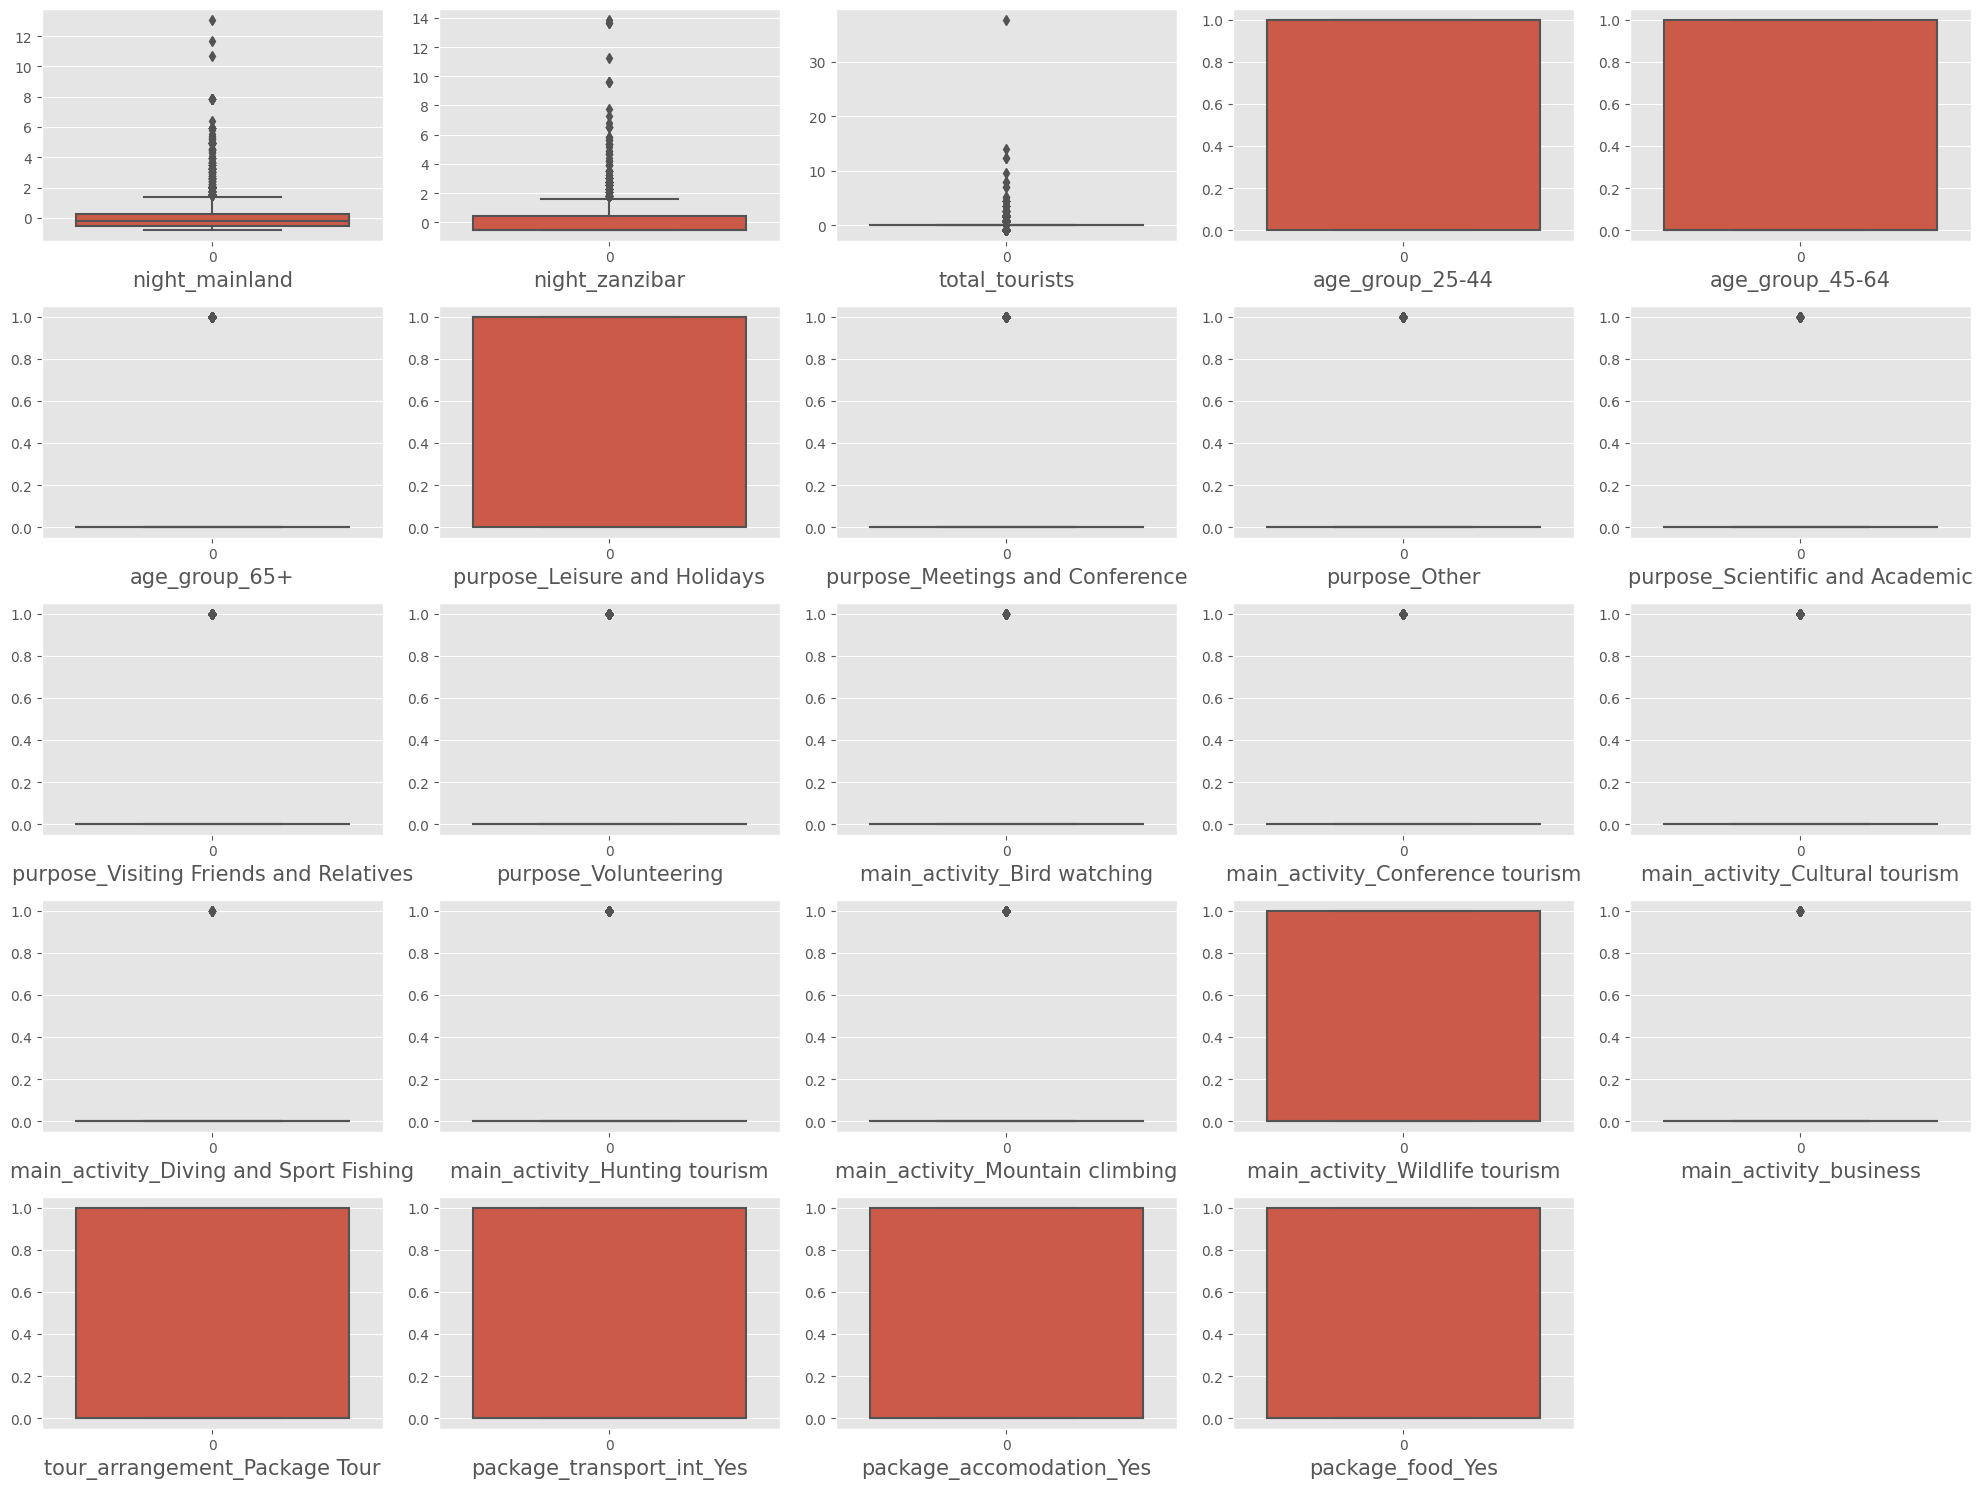

In [42]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

In [43]:
model_test.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/model_test.csv')

In [44]:
model_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   night_mainland                          1601 non-null   float64
 1   night_zanzibar                          1601 non-null   float64
 2   total_tourists                          1601 non-null   float64
 3   age_group_25-44                         1601 non-null   uint8  
 4   age_group_45-64                         1601 non-null   uint8  
 5   age_group_65+                           1601 non-null   uint8  
 6   purpose_Leisure and Holidays            1601 non-null   uint8  
 7   purpose_Meetings and Conference         1601 non-null   uint8  
 8   purpose_Other                           1601 non-null   uint8  
 9   purpose_Scientific and Academic         1601 non-null   uint8  
 10  purpose_Visiting Friends and Relatives  1601 non-null   uint

# Splitting data into test and train sets

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [46]:
X_train.head()

,night_mainland,night_zanzibar,total_tourists,age_group_25-44,age_group_45-64,age_group_65+,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,...,package_accomodation_Yes,package_food_Yes,package_transport_tz_Yes,package_sightseeing_Yes,package_guided_tour_Yes,package_insurance_Yes,payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,first_trip_tz_Yes
2243,0.528647,-0.545215,-0.887028,0,0,1,1,0,0,0,...,1,1,1,0,0,0,0,0,0,1
2170,-0.622262,0.874352,-0.008413,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3796,-0.622262,-0.545215,-0.008413,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3422,-0.814081,1.820730,-0.008413,1,0,0,1,0,0,0,...,1,1,1,0,0,0,0,0,0,1
4318,-0.526353,-0.545215,0.870202,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Training and Testing the models

# Linear regression

In [47]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression

#training the model
lr = LinearRegression().fit(X_train, y_train)

#making predictions
y_pred1 = lr.predict(X_test)
y_true = y_test

#evaluating using mean squared error
lr_score = mae(y_true, y_pred1)
lr_score

5727606.879362036

This model performs poorly with our data

# K-nearest neighbors(KNN)

In [48]:
from sklearn.neighbors import KNeighborsRegressor

#training the model
knn = KNeighborsRegressor(n_neighbors =2).fit(X_train, y_train)

#making predictions
y_pred2 = knn.predict(X_test)

#evaluating the model
knn_score = mae(y_true, y_pred2)
knn_score

6388657.43956359

# Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor

#Training the model
rfr = RandomForestRegressor(max_depth=10).fit(X_train, y_train)

#making predictions
y_pred3 = rfr.predict(X_test)

#evaluating the model
rfr_score = mae(y_true, y_pred3)
rfr_score

5332559.641837806

# Gradient boosting

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

#training the model
gbr = GradientBoostingRegressor(n_estimators = 250).fit(X_train, y_train)

#making predictions
y_pred4 = gbr.predict(X_test)

#evaluating the model
gbr_score = mae(y_true, y_pred4)
gbr_score

5361186.307683001

## Neural Networks

Starting off with a simple neural network

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.layers import Dropout

In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3606 entries, 2243 to 3203
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   night_mainland                          3606 non-null   float64
 1   night_zanzibar                          3606 non-null   float64
 2   total_tourists                          3606 non-null   float64
 3   age_group_25-44                         3606 non-null   uint8  
 4   age_group_45-64                         3606 non-null   uint8  
 5   age_group_65+                           3606 non-null   uint8  
 6   purpose_Leisure and Holidays            3606 non-null   uint8  
 7   purpose_Meetings and Conference         3606 non-null   uint8  
 8   purpose_Other                           3606 non-null   uint8  
 9   purpose_Scientific and Academic         3606 non-null   uint8  
 10  purpose_Visiting Friends and Relatives  3606 non-null   u

In [54]:
simple_nn = Sequential()
simple_nn.add(InputLayer((32,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/models/simple_nn', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[MeanAbsoluteError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), callbacks=[cp], epochs=100)

Epoch 1/100
 96/113 [========================>.....] - ETA: 0s - loss: 208513162805248.0000 - mean_absolute_error: 7983518.0000

113/113 [==============================] - 6s 44ms/step - loss: 212529410211840.0000 - mean_absolute_error: 8016913.0000 - val_loss: 223373380550656.0000 - val_mean_absolute_error: 8403444.0000
Epoch 2/100
112/113 [============================>.] - ETA: 0s - loss: 213455143436288.0000 - mean_absolute_error: 8031253.5000

113/113 [==============================] - 5s 41ms/step - loss: 212446128111616.0000 - mean_absolute_error: 8013289.0000 - val_loss: 223232837812224.0000 - val_mean_absolute_error: 8397664.0000
Epoch 3/100
104/113 [==========================>...] - ETA: 0s - loss: 207200412762112.0000 - mean_absolute_error: 7884220.5000

113/113 [==============================] - 2s 17ms/step - loss: 212260773429248.0000 - mean_absolute_error: 8005407.5000 - val_loss: 222989786284032.0000 - val_mean_absolute_error: 8387657.0000
Epoch 4/100
 89/113 [======================>.......] - ETA: 0s - loss: 208769216675840.0000 - mean_absolute_error: 7901386.0000

113/113 [==============================] - 1s 8ms/step - loss: 211979855724544.0000 - mean_absolute_error: 7993068.5000 - val_loss: 222647027761152.0000 - val_mean_absolute_error: 8373528.0000
Epoch 5/100
 97/113 [========================>.....] - ETA: 0s - loss: 205925897994240.0000 - mean_absolute_error: 7795635.5000

113/113 [==============================] - 1s 8ms/step - loss: 211609582567424.0000 - mean_absolute_error: 7977387.0000 - val_loss: 222215031226368.0000 - val_mean_absolute_error: 8355774.5000
Epoch 6/100
 93/113 [=======================>......] - ETA: 0s - loss: 212076156944384.0000 - mean_absolute_error: 7925445.0000

113/113 [==============================] - 1s 8ms/step - loss: 211152000778240.0000 - mean_absolute_error: 7957390.5000 - val_loss: 221686800580608.0000 - val_mean_absolute_error: 8334196.5000
Epoch 7/100
 92/113 [=======================>......] - ETA: 0s - loss: 216409040748544.0000 - mean_absolute_error: 8034896.0000

113/113 [==============================] - 1s 8ms/step - loss: 210615280861184.0000 - mean_absolute_error: 7933844.5000 - val_loss: 221083324121088.0000 - val_mean_absolute_error: 8309575.5000
Epoch 8/100
103/113 [==========================>...] - ETA: 0s - loss: 203961755762688.0000 - mean_absolute_error: 7821220.0000

113/113 [==============================] - 1s 9ms/step - loss: 209999288598528.0000 - mean_absolute_error: 7907532.0000 - val_loss: 220403662323712.0000 - val_mean_absolute_error: 8282000.5000
Epoch 9/100
112/113 [============================>.] - ETA: 0s - loss: 209184737984512.0000 - mean_absolute_error: 7883811.0000

113/113 [==============================] - 1s 8ms/step - loss: 209307899527168.0000 - mean_absolute_error: 7877861.0000 - val_loss: 219631457402880.0000 - val_mean_absolute_error: 8251191.0000
Epoch 10/100
103/113 [==========================>...] - ETA: 0s - loss: 212640743817216.0000 - mean_absolute_error: 7909476.5000

113/113 [==============================] - 1s 9ms/step - loss: 208543982551040.0000 - mean_absolute_error: 7845515.0000 - val_loss: 218800565780480.0000 - val_mean_absolute_error: 8218243.5000
Epoch 11/100
 85/113 [=====================>........] - ETA: 0s - loss: 213251333816320.0000 - mean_absolute_error: 7891516.0000

113/113 [==============================] - 1s 8ms/step - loss: 207714718318592.0000 - mean_absolute_error: 7810931.0000 - val_loss: 217901843873792.0000 - val_mean_absolute_error: 8183149.0000
Epoch 12/100
112/113 [============================>.] - ETA: 0s - loss: 207363973840896.0000 - mean_absolute_error: 7780337.0000

113/113 [==============================] - 2s 18ms/step - loss: 206828629655552.0000 - mean_absolute_error: 7774300.0000 - val_loss: 216932255006720.0000 - val_mean_absolute_error: 8145824.5000
Epoch 13/100
 99/113 [=========================>....] - ETA: 0s - loss: 200133480284160.0000 - mean_absolute_error: 7667297.5000

113/113 [==============================] - 2s 17ms/step - loss: 205880045862912.0000 - mean_absolute_error: 7736068.0000 - val_loss: 215918273626112.0000 - val_mean_absolute_error: 8107052.5000
Epoch 14/100
112/113 [============================>.] - ETA: 0s - loss: 204422877544448.0000 - mean_absolute_error: 7672969.0000

113/113 [==============================] - 2s 14ms/step - loss: 204878278295552.0000 - mean_absolute_error: 7696230.5000 - val_loss: 214838642999296.0000 - val_mean_absolute_error: 8066154.5000
Epoch 15/100
104/113 [==========================>...] - ETA: 0s - loss: 206041727893504.0000 - mean_absolute_error: 7630848.0000

113/113 [==============================] - 1s 8ms/step - loss: 203818344120320.0000 - mean_absolute_error: 7654506.0000 - val_loss: 213701516853248.0000 - val_mean_absolute_error: 8023489.5000
Epoch 16/100
 90/113 [======================>.......] - ETA: 0s - loss: 197494273212416.0000 - mean_absolute_error: 7504869.0000

113/113 [==============================] - 1s 8ms/step - loss: 202708732608512.0000 - mean_absolute_error: 7612030.5000 - val_loss: 212514696593408.0000 - val_mean_absolute_error: 7979326.5000
Epoch 17/100
109/113 [===========================>..] - ETA: 0s - loss: 202150638518272.0000 - mean_absolute_error: 7593098.5000

113/113 [==============================] - 1s 9ms/step - loss: 201556490190848.0000 - mean_absolute_error: 7567288.0000 - val_loss: 211277393690624.0000 - val_mean_absolute_error: 7933576.5000
Epoch 18/100
 85/113 [=====================>........] - ETA: 0s - loss: 211329805713408.0000 - mean_absolute_error: 7725156.0000

113/113 [==============================] - 1s 8ms/step - loss: 200363177148416.0000 - mean_absolute_error: 7521983.5000 - val_loss: 209986135261184.0000 - val_mean_absolute_error: 7886551.0000
Epoch 19/100
 91/113 [=======================>......] - ETA: 0s - loss: 200081403805696.0000 - mean_absolute_error: 7552877.5000

113/113 [==============================] - 1s 8ms/step - loss: 199125320597504.0000 - mean_absolute_error: 7476905.5000 - val_loss: 208689222909952.0000 - val_mean_absolute_error: 7840074.5000
Epoch 20/100
 90/113 [======================>.......] - ETA: 0s - loss: 199012057612288.0000 - mean_absolute_error: 7465450.0000

113/113 [==============================] - 1s 8ms/step - loss: 197853439852544.0000 - mean_absolute_error: 7429609.5000 - val_loss: 207330704621568.0000 - val_mean_absolute_error: 7792279.0000
Epoch 21/100
112/113 [============================>.] - ETA: 0s - loss: 197254728122368.0000 - mean_absolute_error: 7393096.5000

113/113 [==============================] - 1s 9ms/step - loss: 196547367141376.0000 - mean_absolute_error: 7382366.5000 - val_loss: 205926048989184.0000 - val_mean_absolute_error: 7742978.0000
Epoch 22/100
 91/113 [=======================>......] - ETA: 0s - loss: 206773382283264.0000 - mean_absolute_error: 7596903.5000

113/113 [==============================] - 1s 8ms/step - loss: 195207152795648.0000 - mean_absolute_error: 7334034.0000 - val_loss: 204494902132736.0000 - val_mean_absolute_error: 7692747.0000
Epoch 23/100
 95/113 [========================>.....] - ETA: 0s - loss: 201600312279040.0000 - mean_absolute_error: 7331903.5000

113/113 [==============================] - 1s 9ms/step - loss: 193835497947136.0000 - mean_absolute_error: 7285555.5000 - val_loss: 203056004202496.0000 - val_mean_absolute_error: 7642674.0000
Epoch 24/100
112/113 [============================>.] - ETA: 0s - loss: 191587619438592.0000 - mean_absolute_error: 7221988.5000

113/113 [==============================] - 1s 9ms/step - loss: 192435053395968.0000 - mean_absolute_error: 7236165.0000 - val_loss: 201571505799168.0000 - val_mean_absolute_error: 7591162.5000
Epoch 25/100
108/113 [===========================>..] - ETA: 0s - loss: 192288605077504.0000 - mean_absolute_error: 7200236.0000

113/113 [==============================] - 1s 12ms/step - loss: 191005936582656.0000 - mean_absolute_error: 7186655.0000 - val_loss: 200055332012032.0000 - val_mean_absolute_error: 7538596.0000
Epoch 26/100
102/113 [==========================>...] - ETA: 0s - loss: 190478561574912.0000 - mean_absolute_error: 7173571.0000

113/113 [==============================] - 1s 11ms/step - loss: 189555126829056.0000 - mean_absolute_error: 7136792.0000 - val_loss: 198509143785472.0000 - val_mean_absolute_error: 7485412.0000
Epoch 27/100
101/113 [=========================>....] - ETA: 0s - loss: 187697318592512.0000 - mean_absolute_error: 7065456.0000

113/113 [==============================] - 1s 12ms/step - loss: 188075560927232.0000 - mean_absolute_error: 7086923.5000 - val_loss: 196949298905088.0000 - val_mean_absolute_error: 7432188.5000
Epoch 28/100
 90/113 [======================>.......] - ETA: 0s - loss: 193509399199744.0000 - mean_absolute_error: 7159442.0000

113/113 [==============================] - 1s 8ms/step - loss: 186579888898048.0000 - mean_absolute_error: 7036608.0000 - val_loss: 195343098576896.0000 - val_mean_absolute_error: 7378251.0000
Epoch 29/100
 95/113 [========================>.....] - ETA: 0s - loss: 177914070958080.0000 - mean_absolute_error: 6865515.0000

113/113 [==============================] - 1s 8ms/step - loss: 185060477108224.0000 - mean_absolute_error: 6987240.0000 - val_loss: 193758222090240.0000 - val_mean_absolute_error: 7325432.0000
Epoch 30/100
 96/113 [========================>.....] - ETA: 0s - loss: 179719198736384.0000 - mean_absolute_error: 6841846.5000

113/113 [==============================] - 1s 8ms/step - loss: 183524959191040.0000 - mean_absolute_error: 6937229.5000 - val_loss: 192127946457088.0000 - val_mean_absolute_error: 7271235.0000
Epoch 31/100
 92/113 [=======================>......] - ETA: 0s - loss: 187100032925696.0000 - mean_absolute_error: 6985098.5000

113/113 [==============================] - 2s 14ms/step - loss: 181981472096256.0000 - mean_absolute_error: 6887321.0000 - val_loss: 190464284164096.0000 - val_mean_absolute_error: 7216527.0000
Epoch 32/100
113/113 [==============================] - ETA: 0s - loss: 180428136775680.0000 - mean_absolute_error: 6835989.0000

113/113 [==============================] - 1s 8ms/step - loss: 180428136775680.0000 - mean_absolute_error: 6835989.0000 - val_loss: 188810671423488.0000 - val_mean_absolute_error: 7162586.5000
Epoch 33/100
 92/113 [=======================>......] - ETA: 0s - loss: 175395424960512.0000 - mean_absolute_error: 6808896.0000

113/113 [==============================] - 1s 9ms/step - loss: 178861329350656.0000 - mean_absolute_error: 6788231.0000 - val_loss: 187165749280768.0000 - val_mean_absolute_error: 7109377.5000
Epoch 34/100
106/113 [===========================>..] - ETA: 0s - loss: 178896578281472.0000 - mean_absolute_error: 6765903.0000

113/113 [==============================] - 1s 8ms/step - loss: 177284623368192.0000 - mean_absolute_error: 6738486.0000 - val_loss: 185503043289088.0000 - val_mean_absolute_error: 7056045.5000
Epoch 35/100
105/113 [==========================>...] - ETA: 0s - loss: 177334132932608.0000 - mean_absolute_error: 6677017.5000

113/113 [==============================] - 1s 9ms/step - loss: 175699763658752.0000 - mean_absolute_error: 6689871.5000 - val_loss: 183823056764928.0000 - val_mean_absolute_error: 7002838.0000
Epoch 36/100
110/113 [============================>.] - ETA: 0s - loss: 170728724889600.0000 - mean_absolute_error: 6583161.0000

113/113 [==============================] - 1s 8ms/step - loss: 174108813819904.0000 - mean_absolute_error: 6641050.5000 - val_loss: 182144479526912.0000 - val_mean_absolute_error: 6950630.5000
Epoch 37/100
 86/113 [=====================>........] - ETA: 0s - loss: 166475163762688.0000 - mean_absolute_error: 6519503.0000

113/113 [==============================] - 1s 10ms/step - loss: 172511371198464.0000 - mean_absolute_error: 6592646.0000 - val_loss: 180450198814720.0000 - val_mean_absolute_error: 6898680.5000
Epoch 38/100
 95/113 [========================>.....] - ETA: 0s - loss: 178236092841984.0000 - mean_absolute_error: 6669038.5000

113/113 [==============================] - 2s 14ms/step - loss: 170919448281088.0000 - mean_absolute_error: 6544898.5000 - val_loss: 178726490865664.0000 - val_mean_absolute_error: 6846330.5000
Epoch 39/100
105/113 [==========================>...] - ETA: 0s - loss: 169028203053056.0000 - mean_absolute_error: 6516931.0000

113/113 [==============================] - 1s 12ms/step - loss: 169320747368448.0000 - mean_absolute_error: 6497887.5000 - val_loss: 177046638559232.0000 - val_mean_absolute_error: 6796101.5000
Epoch 40/100
113/113 [==============================] - ETA: 0s - loss: 167726995734528.0000 - mean_absolute_error: 6450402.0000

113/113 [==============================] - 1s 11ms/step - loss: 167726995734528.0000 - mean_absolute_error: 6450402.0000 - val_loss: 175363615358976.0000 - val_mean_absolute_error: 6746217.5000
Epoch 41/100
 99/113 [=========================>....] - ETA: 0s - loss: 159229923033088.0000 - mean_absolute_error: 6282888.5000

113/113 [==============================] - 1s 8ms/step - loss: 166129049796608.0000 - mean_absolute_error: 6405190.5000 - val_loss: 173672270659584.0000 - val_mean_absolute_error: 6696395.0000
Epoch 42/100
 87/113 [======================>.......] - ETA: 0s - loss: 168108643844096.0000 - mean_absolute_error: 6449650.0000

113/113 [==============================] - 1s 8ms/step - loss: 164540012560384.0000 - mean_absolute_error: 6359220.0000 - val_loss: 171977167863808.0000 - val_mean_absolute_error: 6646920.0000
Epoch 43/100
 95/113 [========================>.....] - ETA: 0s - loss: 162239420039168.0000 - mean_absolute_error: 6382838.5000

113/113 [==============================] - 1s 8ms/step - loss: 162953911336960.0000 - mean_absolute_error: 6314374.5000 - val_loss: 170276209819648.0000 - val_mean_absolute_error: 6597427.5000
Epoch 44/100
 93/113 [=======================>......] - ETA: 0s - loss: 167018561011712.0000 - mean_absolute_error: 6391678.0000

113/113 [==============================] - 1s 8ms/step - loss: 161380644683776.0000 - mean_absolute_error: 6270484.5000 - val_loss: 168588019236864.0000 - val_mean_absolute_error: 6549224.5000
Epoch 45/100
 94/113 [=======================>......] - ETA: 0s - loss: 164071106150400.0000 - mean_absolute_error: 6256638.0000

113/113 [==============================] - 1s 8ms/step - loss: 159815615643648.0000 - mean_absolute_error: 6229129.5000 - val_loss: 166941905911808.0000 - val_mean_absolute_error: 6503137.0000
Epoch 46/100
 86/113 [=====================>........] - ETA: 0s - loss: 159357513760768.0000 - mean_absolute_error: 6215458.0000

113/113 [==============================] - 1s 8ms/step - loss: 158256576069632.0000 - mean_absolute_error: 6187711.0000 - val_loss: 165275525709824.0000 - val_mean_absolute_error: 6457690.5000
Epoch 47/100
 99/113 [=========================>....] - ETA: 0s - loss: 165158018088960.0000 - mean_absolute_error: 6297209.5000

113/113 [==============================] - 1s 9ms/step - loss: 156709683200000.0000 - mean_absolute_error: 6146102.0000 - val_loss: 163618238758912.0000 - val_mean_absolute_error: 6413469.0000
Epoch 48/100
 98/113 [=========================>....] - ETA: 0s - loss: 150967311925248.0000 - mean_absolute_error: 6044650.5000

113/113 [==============================] - 1s 8ms/step - loss: 155178862903296.0000 - mean_absolute_error: 6107312.5000 - val_loss: 161998130118656.0000 - val_mean_absolute_error: 6371249.5000
Epoch 49/100
112/113 [============================>.] - ETA: 0s - loss: 154394444169216.0000 - mean_absolute_error: 6084362.5000

113/113 [==============================] - 2s 15ms/step - loss: 153668695359488.0000 - mean_absolute_error: 6067907.5000 - val_loss: 160370471731200.0000 - val_mean_absolute_error: 6329282.5000
Epoch 50/100
 89/113 [======================>.......] - ETA: 0s - loss: 157213133897728.0000 - mean_absolute_error: 6040070.0000

113/113 [==============================] - 2s 14ms/step - loss: 152162554347520.0000 - mean_absolute_error: 6031335.0000 - val_loss: 158783447760896.0000 - val_mean_absolute_error: 6288672.0000
Epoch 51/100
103/113 [==========================>...] - ETA: 0s - loss: 153253476040704.0000 - mean_absolute_error: 6020758.5000

113/113 [==============================] - 1s 13ms/step - loss: 150673677090816.0000 - mean_absolute_error: 5996893.5000 - val_loss: 157189461245952.0000 - val_mean_absolute_error: 6248411.0000
Epoch 52/100
112/113 [============================>.] - ETA: 0s - loss: 149833692217344.0000 - mean_absolute_error: 5971524.5000

113/113 [==============================] - 1s 13ms/step - loss: 149196074123264.0000 - mean_absolute_error: 5963433.5000 - val_loss: 155620523114496.0000 - val_mean_absolute_error: 6209895.0000
Epoch 53/100
 85/113 [=====================>........] - ETA: 0s - loss: 148094918328320.0000 - mean_absolute_error: 5904080.0000

113/113 [==============================] - 1s 9ms/step - loss: 147738788364288.0000 - mean_absolute_error: 5930460.0000 - val_loss: 154036854587392.0000 - val_mean_absolute_error: 6172033.0000
Epoch 54/100
111/113 [============================>.] - ETA: 0s - loss: 146819782803456.0000 - mean_absolute_error: 5907940.5000

113/113 [==============================] - 1s 9ms/step - loss: 146298682474496.0000 - mean_absolute_error: 5901042.0000 - val_loss: 152492696403968.0000 - val_mean_absolute_error: 6136329.0000
Epoch 55/100
 84/113 [=====================>........] - ETA: 0s - loss: 142321190436864.0000 - mean_absolute_error: 5895329.5000

113/113 [==============================] - 1s 9ms/step - loss: 144877836828672.0000 - mean_absolute_error: 5872126.5000 - val_loss: 150969258082304.0000 - val_mean_absolute_error: 6101560.5000
Epoch 56/100
112/113 [============================>.] - ETA: 0s - loss: 143088412524544.0000 - mean_absolute_error: 5843317.0000

113/113 [==============================] - 1s 9ms/step - loss: 143474791809024.0000 - mean_absolute_error: 5845484.5000 - val_loss: 149477914574848.0000 - val_mean_absolute_error: 6068273.5000
Epoch 57/100
105/113 [==========================>...] - ETA: 0s - loss: 142078692556800.0000 - mean_absolute_error: 5803437.0000

113/113 [==============================] - 1s 9ms/step - loss: 142097852137472.0000 - mean_absolute_error: 5819978.0000 - val_loss: 147973837160448.0000 - val_mean_absolute_error: 6037104.0000
Epoch 58/100
 97/113 [========================>.....] - ETA: 0s - loss: 138414833795072.0000 - mean_absolute_error: 5752251.5000

113/113 [==============================] - 1s 7ms/step - loss: 140740894130176.0000 - mean_absolute_error: 5796666.5000 - val_loss: 146524688351232.0000 - val_mean_absolute_error: 6009040.0000
Epoch 59/100
 95/113 [========================>.....] - ETA: 0s - loss: 137082789953536.0000 - mean_absolute_error: 5719621.5000

113/113 [==============================] - 1s 9ms/step - loss: 139408355360768.0000 - mean_absolute_error: 5774255.5000 - val_loss: 145090186051584.0000 - val_mean_absolute_error: 5982002.0000
Epoch 60/100
110/113 [============================>.] - ETA: 0s - loss: 138716588802048.0000 - mean_absolute_error: 5752468.0000

113/113 [==============================] - 1s 8ms/step - loss: 138098256117760.0000 - mean_absolute_error: 5754305.0000 - val_loss: 143682359525376.0000 - val_mean_absolute_error: 5955863.0000
Epoch 61/100
 97/113 [========================>.....] - ETA: 0s - loss: 135234251128832.0000 - mean_absolute_error: 5709480.0000

113/113 [==============================] - 1s 8ms/step - loss: 136817349230592.0000 - mean_absolute_error: 5734686.0000 - val_loss: 142271043338240.0000 - val_mean_absolute_error: 5930896.0000
Epoch 62/100
 89/113 [======================>.......] - ETA: 0s - loss: 139349970649088.0000 - mean_absolute_error: 5843349.5000

113/113 [==============================] - 1s 8ms/step - loss: 135560693809152.0000 - mean_absolute_error: 5717547.5000 - val_loss: 140898264416256.0000 - val_mean_absolute_error: 5907778.0000
Epoch 63/100
 98/113 [=========================>....] - ETA: 0s - loss: 131342566162432.0000 - mean_absolute_error: 5646154.0000

113/113 [==============================] - 1s 9ms/step - loss: 134327895588864.0000 - mean_absolute_error: 5699692.0000 - val_loss: 139577914294272.0000 - val_mean_absolute_error: 5886807.5000
Epoch 64/100
106/113 [===========================>..] - ETA: 0s - loss: 128227087482880.0000 - mean_absolute_error: 5590920.0000

113/113 [==============================] - 1s 13ms/step - loss: 133121471152128.0000 - mean_absolute_error: 5684834.0000 - val_loss: 138290724339712.0000 - val_mean_absolute_error: 5867079.5000
Epoch 65/100
 95/113 [========================>.....] - ETA: 0s - loss: 130465713356800.0000 - mean_absolute_error: 5647111.5000

113/113 [==============================] - 1s 12ms/step - loss: 131941613436928.0000 - mean_absolute_error: 5672714.0000 - val_loss: 136989760290816.0000 - val_mean_absolute_error: 5848196.0000
Epoch 66/100
107/113 [===========================>..] - ETA: 0s - loss: 133315877142528.0000 - mean_absolute_error: 5685275.5000

113/113 [==============================] - 1s 12ms/step - loss: 130791526891520.0000 - mean_absolute_error: 5661142.5000 - val_loss: 135719783759872.0000 - val_mean_absolute_error: 5830585.5000
Epoch 67/100
113/113 [==============================] - ETA: 0s - loss: 129674130751488.0000 - mean_absolute_error: 5650702.0000

113/113 [==============================] - 1s 9ms/step - loss: 129674130751488.0000 - mean_absolute_error: 5650702.0000 - val_loss: 134504677113856.0000 - val_mean_absolute_error: 5815095.5000
Epoch 68/100
 84/113 [=====================>........] - ETA: 0s - loss: 130702582480896.0000 - mean_absolute_error: 5630554.0000

113/113 [==============================] - 1s 8ms/step - loss: 128587579523072.0000 - mean_absolute_error: 5643326.0000 - val_loss: 133296449126400.0000 - val_mean_absolute_error: 5800813.0000
Epoch 69/100
 94/113 [=======================>......] - ETA: 0s - loss: 123744030818304.0000 - mean_absolute_error: 5631876.0000

113/113 [==============================] - 2s 19ms/step - loss: 127533760643072.0000 - mean_absolute_error: 5637450.0000 - val_loss: 132150254895104.0000 - val_mean_absolute_error: 5788878.0000
Epoch 70/100
 82/113 [====================>.........] - ETA: 0s - loss: 132273995251712.0000 - mean_absolute_error: 5766859.5000

113/113 [==============================] - 1s 9ms/step - loss: 126512749608960.0000 - mean_absolute_error: 5634462.5000 - val_loss: 131015938932736.0000 - val_mean_absolute_error: 5778798.0000
Epoch 71/100
112/113 [============================>.] - ETA: 0s - loss: 125822014849024.0000 - mean_absolute_error: 5630896.5000

113/113 [==============================] - 1s 8ms/step - loss: 125524110213120.0000 - mean_absolute_error: 5631757.5000 - val_loss: 129948027191296.0000 - val_mean_absolute_error: 5770437.5000
Epoch 72/100
 91/113 [=======================>......] - ETA: 0s - loss: 118532020895744.0000 - mean_absolute_error: 5547038.0000

113/113 [==============================] - 1s 8ms/step - loss: 124568446435328.0000 - mean_absolute_error: 5629357.5000 - val_loss: 128872993521664.0000 - val_mean_absolute_error: 5762797.5000
Epoch 73/100
 96/113 [========================>.....] - ETA: 0s - loss: 127363790667776.0000 - mean_absolute_error: 5692737.5000

113/113 [==============================] - 1s 8ms/step - loss: 123643921170432.0000 - mean_absolute_error: 5628977.0000 - val_loss: 127853400162304.0000 - val_mean_absolute_error: 5757554.0000
Epoch 74/100
 94/113 [=======================>......] - ETA: 0s - loss: 122628178182144.0000 - mean_absolute_error: 5614818.5000

113/113 [==============================] - 1s 8ms/step - loss: 122753613037568.0000 - mean_absolute_error: 5629986.0000 - val_loss: 126867109576704.0000 - val_mean_absolute_error: 5753806.0000
Epoch 75/100
 88/113 [======================>.......] - ETA: 0s - loss: 121230929690624.0000 - mean_absolute_error: 5633928.5000

113/113 [==============================] - 1s 9ms/step - loss: 121902488092672.0000 - mean_absolute_error: 5634173.5000 - val_loss: 125899877908480.0000 - val_mean_absolute_error: 5750699.0000
Epoch 76/100
103/113 [==========================>...] - ETA: 0s - loss: 125863957889024.0000 - mean_absolute_error: 5699648.0000

113/113 [==============================] - 1s 13ms/step - loss: 121078433185792.0000 - mean_absolute_error: 5636135.0000 - val_loss: 124975033876480.0000 - val_mean_absolute_error: 5747926.0000
Epoch 77/100
104/113 [==========================>...] - ETA: 0s - loss: 114929793236992.0000 - mean_absolute_error: 5552156.5000

113/113 [==============================] - 1s 13ms/step - loss: 120284392718336.0000 - mean_absolute_error: 5639407.5000 - val_loss: 124106871668736.0000 - val_mean_absolute_error: 5746929.5000
Epoch 78/100
113/113 [==============================] - ETA: 0s - loss: 119527480229888.0000 - mean_absolute_error: 5645579.5000

113/113 [==============================] - 1s 13ms/step - loss: 119527480229888.0000 - mean_absolute_error: 5645579.5000 - val_loss: 123239254720512.0000 - val_mean_absolute_error: 5747455.5000
Epoch 79/100
 86/113 [=====================>........] - ETA: 0s - loss: 122262384541696.0000 - mean_absolute_error: 5707341.5000

113/113 [==============================] - 1s 8ms/step - loss: 118800062087168.0000 - mean_absolute_error: 5652934.5000 - val_loss: 122403556425728.0000 - val_mean_absolute_error: 5749000.0000
Epoch 80/100
 96/113 [========================>.....] - ETA: 0s - loss: 121531535458304.0000 - mean_absolute_error: 5739169.5000

113/113 [==============================] - 1s 8ms/step - loss: 118101232320512.0000 - mean_absolute_error: 5659938.0000 - val_loss: 121611864768512.0000 - val_mean_absolute_error: 5751106.5000
Epoch 81/100
 91/113 [=======================>......] - ETA: 0s - loss: 111378023055360.0000 - mean_absolute_error: 5531749.0000

113/113 [==============================] - 1s 8ms/step - loss: 117433893388288.0000 - mean_absolute_error: 5668149.5000 - val_loss: 120876133515264.0000 - val_mean_absolute_error: 5754408.5000
Epoch 82/100
105/113 [==========================>...] - ETA: 0s - loss: 117053168025600.0000 - mean_absolute_error: 5677403.0000

113/113 [==============================] - 1s 8ms/step - loss: 116794975059968.0000 - mean_absolute_error: 5678398.5000 - val_loss: 120130386264064.0000 - val_mean_absolute_error: 5758878.5000
Epoch 83/100
107/113 [===========================>..] - ETA: 0s - loss: 115876380540928.0000 - mean_absolute_error: 5655775.5000

113/113 [==============================] - 1s 9ms/step - loss: 116194208120832.0000 - mean_absolute_error: 5690547.5000 - val_loss: 119426112290816.0000 - val_mean_absolute_error: 5764261.0000
Epoch 84/100
102/113 [==========================>...] - ETA: 0s - loss: 115040539639808.0000 - mean_absolute_error: 5723586.0000

113/113 [==============================] - 1s 9ms/step - loss: 115616442744832.0000 - mean_absolute_error: 5700825.5000 - val_loss: 118766918696960.0000 - val_mean_absolute_error: 5770161.0000
Epoch 85/100
108/113 [===========================>..] - ETA: 0s - loss: 114141977116672.0000 - mean_absolute_error: 5691636.5000

113/113 [==============================] - 1s 13ms/step - loss: 115071862702080.0000 - mean_absolute_error: 5712750.5000 - val_loss: 118134082109440.0000 - val_mean_absolute_error: 5777029.0000
Epoch 86/100
103/113 [==========================>...] - ETA: 0s - loss: 113295432351744.0000 - mean_absolute_error: 5703744.5000

113/113 [==============================] - 2s 14ms/step - loss: 114552138104832.0000 - mean_absolute_error: 5725363.0000 - val_loss: 117511236354048.0000 - val_mean_absolute_error: 5785296.5000
Epoch 87/100
 90/113 [======================>.......] - ETA: 0s - loss: 106806038757376.0000 - mean_absolute_error: 5591182.5000

113/113 [==============================] - 1s 9ms/step - loss: 114059475156992.0000 - mean_absolute_error: 5737749.0000 - val_loss: 116938235707392.0000 - val_mean_absolute_error: 5793854.0000
Epoch 88/100
103/113 [==========================>...] - ETA: 0s - loss: 116448584269824.0000 - mean_absolute_error: 5797539.5000

113/113 [==============================] - 2s 20ms/step - loss: 113596038119424.0000 - mean_absolute_error: 5751815.0000 - val_loss: 116379814461440.0000 - val_mean_absolute_error: 5803284.5000
Epoch 89/100
111/113 [============================>.] - ETA: 0s - loss: 113975589076992.0000 - mean_absolute_error: 5783751.0000

113/113 [==============================] - 2s 14ms/step - loss: 113158672875520.0000 - mean_absolute_error: 5764918.0000 - val_loss: 115855283191808.0000 - val_mean_absolute_error: 5812964.5000
Epoch 90/100
113/113 [==============================] - ETA: 0s - loss: 112750961360896.0000 - mean_absolute_error: 5781700.5000

113/113 [==============================] - 1s 9ms/step - loss: 112750961360896.0000 - mean_absolute_error: 5781700.5000 - val_loss: 115358560157696.0000 - val_mean_absolute_error: 5822531.0000
Epoch 91/100
 88/113 [======================>.......] - ETA: 0s - loss: 108835645685760.0000 - mean_absolute_error: 5772262.5000

113/113 [==============================] - 1s 8ms/step - loss: 112361226633216.0000 - mean_absolute_error: 5793303.5000 - val_loss: 114898252070912.0000 - val_mean_absolute_error: 5831721.5000
Epoch 92/100
 90/113 [======================>.......] - ETA: 0s - loss: 115838120099840.0000 - mean_absolute_error: 5848523.5000

113/113 [==============================] - 1s 8ms/step - loss: 112001028194304.0000 - mean_absolute_error: 5807835.5000 - val_loss: 114457900482560.0000 - val_mean_absolute_error: 5841021.0000
Epoch 93/100
106/113 [===========================>..] - ETA: 0s - loss: 110318038548480.0000 - mean_absolute_error: 5776360.0000

113/113 [==============================] - 1s 9ms/step - loss: 111656248016896.0000 - mean_absolute_error: 5818104.5000 - val_loss: 114045558456320.0000 - val_mean_absolute_error: 5850079.0000
Epoch 94/100
107/113 [===========================>..] - ETA: 0s - loss: 111749621612544.0000 - mean_absolute_error: 5855021.5000

113/113 [==============================] - 1s 9ms/step - loss: 111334125469696.0000 - mean_absolute_error: 5832882.0000 - val_loss: 113629022126080.0000 - val_mean_absolute_error: 5859711.0000
Epoch 95/100
 97/113 [========================>.....] - ETA: 0s - loss: 116581870862336.0000 - mean_absolute_error: 5959819.0000

113/113 [==============================] - 1s 10ms/step - loss: 111034819936256.0000 - mean_absolute_error: 5847994.5000 - val_loss: 113258220486656.0000 - val_mean_absolute_error: 5868454.0000
Epoch 96/100
106/113 [===========================>..] - ETA: 0s - loss: 113260208586752.0000 - mean_absolute_error: 5894920.5000

113/113 [==============================] - 1s 9ms/step - loss: 110756183932928.0000 - mean_absolute_error: 5860205.0000 - val_loss: 112905655681024.0000 - val_mean_absolute_error: 5877344.0000
Epoch 97/100
106/113 [===========================>..] - ETA: 0s - loss: 109996704530432.0000 - mean_absolute_error: 5869210.0000

113/113 [==============================] - 1s 9ms/step - loss: 110497017888768.0000 - mean_absolute_error: 5871987.5000 - val_loss: 112595302350848.0000 - val_mean_absolute_error: 5884879.5000
Epoch 98/100
 91/113 [=======================>......] - ETA: 0s - loss: 105087087149056.0000 - mean_absolute_error: 5803738.5000

113/113 [==============================] - 1s 8ms/step - loss: 110252489965568.0000 - mean_absolute_error: 5882405.0000 - val_loss: 112279639031808.0000 - val_mean_absolute_error: 5893392.5000
Epoch 99/100
 94/113 [=======================>......] - ETA: 0s - loss: 110316612485120.0000 - mean_absolute_error: 5907742.5000

113/113 [==============================] - 1s 9ms/step - loss: 110024294662144.0000 - mean_absolute_error: 5895607.0000 - val_loss: 111984099983360.0000 - val_mean_absolute_error: 5901570.0000
Epoch 100/100
109/113 [===========================>..] - ETA: 0s - loss: 108495999336448.0000 - mean_absolute_error: 5884097.0000

113/113 [==============================] - 1s 13ms/step - loss: 109808388669440.0000 - mean_absolute_error: 5906186.0000 - val_loss: 111695900966912.0000 - val_mean_absolute_error: 5909513.5000


In [55]:
from tensorflow.keras.models import load_model

simple_nn = load_model('/content/drive/MyDrive/Colab Notebooks/models/simple_nn')

y_pred5 = simple_nn.predict(X_test)

simple_nn_score = mae(y_true, y_pred5)
simple_nn_score

38/38 [==============================] - 0s 3ms/step


5909512.324278886

Moving to a more complicated neural network

# Medium Neural Network

In [56]:
medium_nn = Sequential()
medium_nn.add(InputLayer((32,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/models/medium_nn2', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[MeanAbsoluteError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), callbacks=[cp], epochs=100)

Epoch 1/100
101/113 [=========================>....] - ETA: 0s - loss: 191795170377728.0000 - mean_absolute_error: 7319561.5000

113/113 [==============================] - 4s 23ms/step - loss: 183305093775360.0000 - mean_absolute_error: 7133227.0000 - val_loss: 114116098260992.0000 - val_mean_absolute_error: 5973171.0000
Epoch 2/100
102/113 [==========================>...] - ETA: 0s - loss: 112455330037760.0000 - mean_absolute_error: 6203550.5000

113/113 [==============================] - 1s 11ms/step - loss: 106970304479232.0000 - mean_absolute_error: 6076214.0000 - val_loss: 105204821262336.0000 - val_mean_absolute_error: 5805385.5000
Epoch 3/100
113/113 [==============================] - ETA: 0s - loss: 104528867229696.0000 - mean_absolute_error: 5766358.5000

113/113 [==============================] - 2s 16ms/step - loss: 104528867229696.0000 - mean_absolute_error: 5766358.5000 - val_loss: 103939399745536.0000 - val_mean_absolute_error: 5624442.5000
Epoch 4/100
 98/113 [=========================>....] - ETA: 0s - loss: 104258384953344.0000 - mean_absolute_error: 5709687.5000

113/113 [==============================] - 1s 11ms/step - loss: 103353463865344.0000 - mean_absolute_error: 5756954.5000 - val_loss: 103042347171840.0000 - val_mean_absolute_error: 5578944.5000
Epoch 5/100
109/113 [===========================>..] - ETA: 0s - loss: 103722554228736.0000 - mean_absolute_error: 5686152.0000

113/113 [==============================] - 2s 19ms/step - loss: 102715803828224.0000 - mean_absolute_error: 5666487.5000 - val_loss: 102788474339328.0000 - val_mean_absolute_error: 5523497.5000
Epoch 6/100
110/113 [============================>.] - ETA: 0s - loss: 102902928506880.0000 - mean_absolute_error: 5661108.5000

113/113 [==============================] - 1s 11ms/step - loss: 102453986983936.0000 - mean_absolute_error: 5657334.0000 - val_loss: 101436163620864.0000 - val_mean_absolute_error: 5613796.0000
Epoch 7/100
102/113 [==========================>...] - ETA: 0s - loss: 102843813986304.0000 - mean_absolute_error: 5647823.0000

113/113 [==============================] - 2s 14ms/step - loss: 101931066327040.0000 - mean_absolute_error: 5621643.5000 - val_loss: 101304051433472.0000 - val_mean_absolute_error: 5547558.5000
Epoch 8/100
100/113 [=========================>....] - ETA: 0s - loss: 101952968982528.0000 - mean_absolute_error: 5555282.5000

113/113 [==============================] - 2s 13ms/step - loss: 102046401298432.0000 - mean_absolute_error: 5589544.0000 - val_loss: 100864790364160.0000 - val_mean_absolute_error: 5621009.0000
Epoch 9/100
113/113 [==============================] - 0s 4ms/step - loss: 101325417218048.0000 - mean_absolute_error: 5627698.0000 - val_loss: 103149771685888.0000 - val_mean_absolute_error: 5374437.0000
Epoch 10/100
104/113 [==========================>...] - ETA: 0s - loss: 100338044502016.0000 - mean_absolute_error: 5474733.0000

113/113 [==============================] - 1s 12ms/step - loss: 101230407843840.0000 - mean_absolute_error: 5529234.0000 - val_loss: 100446945411072.0000 - val_mean_absolute_error: 5641761.5000
Epoch 11/100
113/113 [==============================] - 0s 3ms/step - loss: 101249223491584.0000 - mean_absolute_error: 5577518.5000 - val_loss: 100844942917632.0000 - val_mean_absolute_error: 5573570.5000
Epoch 12/100
113/113 [==============================] - 0s 3ms/step - loss: 101046110126080.0000 - mean_absolute_error: 5555473.0000 - val_loss: 101829270568960.0000 - val_mean_absolute_error: 5423510.5000
Epoch 13/100
 96/113 [========================>.....] - ETA: 0s - loss: 101306979057664.0000 - mean_absolute_error: 5504218.5000

113/113 [==============================] - 1s 11ms/step - loss: 101026354954240.0000 - mean_absolute_error: 5545560.5000 - val_loss: 100372974665728.0000 - val_mean_absolute_error: 5613998.5000
Epoch 14/100
113/113 [==============================] - 0s 3ms/step - loss: 100984730681344.0000 - mean_absolute_error: 5525400.5000 - val_loss: 100534673473536.0000 - val_mean_absolute_error: 5545769.0000
Epoch 15/100
113/113 [==============================] - 0s 3ms/step - loss: 100849237884928.0000 - mean_absolute_error: 5558958.5000 - val_loss: 101363098845184.0000 - val_mean_absolute_error: 5430165.5000
Epoch 16/100
113/113 [==============================] - 0s 3ms/step - loss: 100680408760320.0000 - mean_absolute_error: 5541244.5000 - val_loss: 102367668207616.0000 - val_mean_absolute_error: 5372005.0000
Epoch 17/100
113/113 [==============================] - 0s 3ms/step - loss: 100803536748544.0000 - mean_absolute_error: 5497646.0000 - val_loss: 101495815012352.0000 - val_mean_absolute_er

113/113 [==============================] - 1s 10ms/step - loss: 100545838710784.0000 - mean_absolute_error: 5492580.5000 - val_loss: 100075833393152.0000 - val_mean_absolute_error: 5591852.0000
Epoch 20/100
112/113 [============================>.] - ETA: 0s - loss: 99204072472576.0000 - mean_absolute_error: 5486775.5000

113/113 [==============================] - 1s 9ms/step - loss: 100314564788224.0000 - mean_absolute_error: 5511658.5000 - val_loss: 99900821864448.0000 - val_mean_absolute_error: 5610879.0000
Epoch 21/100
113/113 [==============================] - 0s 3ms/step - loss: 100344461787136.0000 - mean_absolute_error: 5526445.0000 - val_loss: 100485365235712.0000 - val_mean_absolute_error: 5433336.0000
Epoch 22/100
113/113 [==============================] - 0s 2ms/step - loss: 100358269435904.0000 - mean_absolute_error: 5491009.5000 - val_loss: 100726713876480.0000 - val_mean_absolute_error: 5401243.0000
Epoch 23/100
 94/113 [=======================>......] - ETA: 0s - loss: 100094380605440.0000 - mean_absolute_error: 5447981.5000

113/113 [==============================] - 1s 10ms/step - loss: 100193743667200.0000 - mean_absolute_error: 5472593.5000 - val_loss: 99870874533888.0000 - val_mean_absolute_error: 5513503.5000
Epoch 24/100
113/113 [==============================] - 0s 3ms/step - loss: 100233044295680.0000 - mean_absolute_error: 5485240.5000 - val_loss: 100148487127040.0000 - val_mean_absolute_error: 5446881.0000
Epoch 25/100
 97/113 [========================>.....] - ETA: 0s - loss: 105210215137280.0000 - mean_absolute_error: 5570337.5000

113/113 [==============================] - 1s 10ms/step - loss: 100189381591040.0000 - mean_absolute_error: 5491212.0000 - val_loss: 99732772880384.0000 - val_mean_absolute_error: 5469833.0000
Epoch 26/100
113/113 [==============================] - 0s 3ms/step - loss: 100015913566208.0000 - mean_absolute_error: 5502871.5000 - val_loss: 101032487026688.0000 - val_mean_absolute_error: 5342793.0000
Epoch 27/100
106/113 [===========================>..] - ETA: 0s - loss: 100128916504576.0000 - mean_absolute_error: 5417908.0000

113/113 [==============================] - 2s 14ms/step - loss: 99807842533376.0000 - mean_absolute_error: 5427042.0000 - val_loss: 99654742048768.0000 - val_mean_absolute_error: 5642947.0000
Epoch 28/100
113/113 [==============================] - 1s 5ms/step - loss: 100101619974144.0000 - mean_absolute_error: 5489297.0000 - val_loss: 100260013670400.0000 - val_mean_absolute_error: 5399845.0000
Epoch 29/100
102/113 [==========================>...] - ETA: 0s - loss: 102855667089408.0000 - mean_absolute_error: 5520632.5000

113/113 [==============================] - 3s 24ms/step - loss: 100012868501504.0000 - mean_absolute_error: 5473402.5000 - val_loss: 99633653088256.0000 - val_mean_absolute_error: 5476488.5000
Epoch 30/100
113/113 [==============================] - 0s 4ms/step - loss: 99873743437824.0000 - mean_absolute_error: 5457473.0000 - val_loss: 100504021499904.0000 - val_mean_absolute_error: 5342876.0000
Epoch 31/100
111/113 [============================>.] - ETA: 0s - loss: 100332776456192.0000 - mean_absolute_error: 5447319.0000

113/113 [==============================] - 1s 13ms/step - loss: 99748635738112.0000 - mean_absolute_error: 5431186.5000 - val_loss: 99279511224320.0000 - val_mean_absolute_error: 5526219.5000
Epoch 32/100
113/113 [==============================] - 0s 3ms/step - loss: 99590426591232.0000 - mean_absolute_error: 5441432.5000 - val_loss: 99391977291776.0000 - val_mean_absolute_error: 5466021.5000
Epoch 33/100
113/113 [==============================] - 0s 3ms/step - loss: 99620331978752.0000 - mean_absolute_error: 5449915.0000 - val_loss: 99427746316288.0000 - val_mean_absolute_error: 5444260.5000
Epoch 34/100
113/113 [==============================] - 0s 4ms/step - loss: 99848770551808.0000 - mean_absolute_error: 5470640.0000 - val_loss: 101251782017024.0000 - val_mean_absolute_error: 5292471.5000
Epoch 35/100
113/113 [==============================] - 1s 11ms/step - loss: 99651713761280.0000 - mean_absolute_error: 5410544.0000 - val_loss: 99486189748224.0000 - val_mean_absolute_error: 547

113/113 [==============================] - 1s 13ms/step - loss: 99767451385856.0000 - mean_absolute_error: 5432241.5000 - val_loss: 99091606405120.0000 - val_mean_absolute_error: 5512601.5000
Epoch 38/100
113/113 [==============================] - 0s 3ms/step - loss: 99108467507200.0000 - mean_absolute_error: 5445244.5000 - val_loss: 101540769562624.0000 - val_mean_absolute_error: 5262570.0000
Epoch 39/100
113/113 [==============================] - 0s 3ms/step - loss: 99470737932288.0000 - mean_absolute_error: 5407526.5000 - val_loss: 99128608555008.0000 - val_mean_absolute_error: 5532905.0000
Epoch 40/100
113/113 [==============================] - 0s 3ms/step - loss: 99546881327104.0000 - mean_absolute_error: 5445644.5000 - val_loss: 99794143936512.0000 - val_mean_absolute_error: 5359537.5000
Epoch 41/100
113/113 [==============================] - 0s 3ms/step - loss: 99345873502208.0000 - mean_absolute_error: 5427183.5000 - val_loss: 99558465994752.0000 - val_mean_absolute_error: 5383

113/113 [==============================] - 2s 21ms/step - loss: 99485166338048.0000 - mean_absolute_error: 5357917.5000 - val_loss: 99082974527488.0000 - val_mean_absolute_error: 5563315.0000
Epoch 47/100
113/113 [==============================] - 1s 7ms/step - loss: 99104424198144.0000 - mean_absolute_error: 5435717.0000 - val_loss: 99214289797120.0000 - val_mean_absolute_error: 5458264.5000
Epoch 48/100
113/113 [==============================] - 1s 7ms/step - loss: 99214684061696.0000 - mean_absolute_error: 5405002.5000 - val_loss: 99969918828544.0000 - val_mean_absolute_error: 5326040.5000
Epoch 49/100
113/113 [==============================] - 1s 8ms/step - loss: 98946013724672.0000 - mean_absolute_error: 5404767.5000 - val_loss: 99518167121920.0000 - val_mean_absolute_error: 5373770.0000
Epoch 50/100
103/113 [==========================>...] - ETA: 0s - loss: 96527603204096.0000 - mean_absolute_error: 5321044.0000

113/113 [==============================] - 2s 16ms/step - loss: 98991756804096.0000 - mean_absolute_error: 5383457.0000 - val_loss: 98762345152512.0000 - val_mean_absolute_error: 5464877.5000
Epoch 51/100
113/113 [==============================] - 0s 4ms/step - loss: 98991681306624.0000 - mean_absolute_error: 5386220.0000 - val_loss: 99888247341056.0000 - val_mean_absolute_error: 5356096.0000
Epoch 52/100
113/113 [==============================] - 0s 4ms/step - loss: 99016637415424.0000 - mean_absolute_error: 5407119.5000 - val_loss: 99147440979968.0000 - val_mean_absolute_error: 5435607.5000
Epoch 53/100
113/113 [==============================] - 0s 3ms/step - loss: 98801561894912.0000 - mean_absolute_error: 5378072.5000 - val_loss: 98858369548288.0000 - val_mean_absolute_error: 5536034.5000
Epoch 54/100
113/113 [==============================] - 0s 3ms/step - loss: 98874693779456.0000 - mean_absolute_error: 5413905.0000 - val_loss: 98909036740608.0000 - val_mean_absolute_error: 54923

113/113 [==============================] - 2s 16ms/step - loss: 98351714402304.0000 - mean_absolute_error: 5312943.0000 - val_loss: 98668417908736.0000 - val_mean_absolute_error: 5509696.0000
Epoch 77/100
113/113 [==============================] - 0s 3ms/step - loss: 98810747420672.0000 - mean_absolute_error: 5361297.5000 - val_loss: 98748847882240.0000 - val_mean_absolute_error: 5523243.5000
Epoch 78/100
113/113 [==============================] - 0s 3ms/step - loss: 98728480342016.0000 - mean_absolute_error: 5380487.5000 - val_loss: 98764945620992.0000 - val_mean_absolute_error: 5519049.0000
Epoch 79/100
113/113 [==============================] - 0s 3ms/step - loss: 98421784444928.0000 - mean_absolute_error: 5340593.0000 - val_loss: 99041283145728.0000 - val_mean_absolute_error: 5375577.0000
Epoch 80/100
113/113 [==============================] - 0s 3ms/step - loss: 98550314696704.0000 - mean_absolute_error: 5360921.5000 - val_loss: 98994449547264.0000 - val_mean_absolute_error: 56198

113/113 [==============================] - 1s 10ms/step - loss: 98462200758272.0000 - mean_absolute_error: 5328951.5000 - val_loss: 98646213263360.0000 - val_mean_absolute_error: 5533231.0000
Epoch 87/100
113/113 [==============================] - 0s 3ms/step - loss: 98328578621440.0000 - mean_absolute_error: 5391518.5000 - val_loss: 99912045821952.0000 - val_mean_absolute_error: 5273257.5000
Epoch 88/100
113/113 [==============================] - 0s 3ms/step - loss: 98564139122688.0000 - mean_absolute_error: 5319148.0000 - val_loss: 98735895871488.0000 - val_mean_absolute_error: 5399480.5000
Epoch 89/100
113/113 [==============================] - 0s 3ms/step - loss: 98371813507072.0000 - mean_absolute_error: 5362965.5000 - val_loss: 99904932282368.0000 - val_mean_absolute_error: 5292294.5000
Epoch 90/100
113/113 [==============================] - 0s 3ms/step - loss: 98407330873344.0000 - mean_absolute_error: 5327633.5000 - val_loss: 99293352427520.0000 - val_mean_absolute_error: 53641

In [57]:

medium_nn = load_model('/content/drive/MyDrive/Colab Notebooks/models/medium_nn2')

y_pred6 = medium_nn.predict(X_test)

medium_nn_score = mae(y_true, y_pred6)
medium_nn_score

38/38 [==============================] - 0s 1ms/step


5533230.5921919495

# Large Neural Networks

In [58]:
large_nn = Sequential()
large_nn.add(InputLayer((32,)))
large_nn.add(Dense(512, 'relu'))
large_nn.add(Dropout(0.01))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dropout(0.01))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dropout(0.01))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dropout(0.01))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dropout(0.01))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/models/large_nn4', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[MeanAbsoluteError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), callbacks=[cp], epochs=100)

Epoch 1/100
112/113 [============================>.] - ETA: 0s - loss: 119091876593664.0000 - mean_absolute_error: 5910114.5000

113/113 [==============================] - 6s 38ms/step - loss: 118777664503808.0000 - mean_absolute_error: 5910288.0000 - val_loss: 139452982755328.0000 - val_mean_absolute_error: 8002882.0000
Epoch 2/100
108/113 [===========================>..] - ETA: 0s - loss: 116715593662464.0000 - mean_absolute_error: 5780515.0000

113/113 [==============================] - 3s 29ms/step - loss: 118204873572352.0000 - mean_absolute_error: 5798815.0000 - val_loss: 106414022328320.0000 - val_mean_absolute_error: 6373655.0000
Epoch 3/100
113/113 [==============================] - 1s 10ms/step - loss: 112619679645696.0000 - mean_absolute_error: 5618419.0000 - val_loss: 108682939465728.0000 - val_mean_absolute_error: 5140442.0000
Epoch 4/100
113/113 [==============================] - 1s 8ms/step - loss: 105664609255424.0000 - mean_absolute_error: 5435774.0000 - val_loss: 116335472279552.0000 - val_mean_absolute_error: 6852057.5000
Epoch 5/100
109/113 [===========================>..] - ETA: 0s - loss: 107088558686208.0000 - mean_absolute_error: 5498728.0000

113/113 [==============================] - 3s 26ms/step - loss: 106871830609920.0000 - mean_absolute_error: 5515271.5000 - val_loss: 105738538057728.0000 - val_mean_absolute_error: 5104238.5000
Epoch 6/100
112/113 [============================>.] - ETA: 0s - loss: 99663432646656.0000 - mean_absolute_error: 5286259.5000

113/113 [==============================] - 4s 37ms/step - loss: 99162347536384.0000 - mean_absolute_error: 5268316.0000 - val_loss: 98115356983296.0000 - val_mean_absolute_error: 4975158.5000
Epoch 7/100
113/113 [==============================] - ETA: 0s - loss: 98847900565504.0000 - mean_absolute_error: 5306064.5000

113/113 [==============================] - 3s 29ms/step - loss: 98847900565504.0000 - mean_absolute_error: 5306064.5000 - val_loss: 95945081487360.0000 - val_mean_absolute_error: 4992639.5000
Epoch 8/100
113/113 [==============================] - 1s 9ms/step - loss: 101662094000128.0000 - mean_absolute_error: 5349831.0000 - val_loss: 107376841588736.0000 - val_mean_absolute_error: 5085476.0000
Epoch 9/100
113/113 [==============================] - 1s 10ms/step - loss: 97080647352320.0000 - mean_absolute_error: 5278703.0000 - val_loss: 108759393239040.0000 - val_mean_absolute_error: 5217301.5000
Epoch 10/100
113/113 [==============================] - 1s 9ms/step - loss: 100559101100032.0000 - mean_absolute_error: 5317852.0000 - val_loss: 98100634976256.0000 - val_mean_absolute_error: 5053270.0000
Epoch 11/100
113/113 [==============================] - 1s 11ms/step - loss: 94155799789568.0000 - mean_absolute_error: 5187304.0000 - val_loss: 101056428113920.0000 - val_mean_absolute_error: 

In [59]:
large_nn = load_model('/content/drive/MyDrive/Colab Notebooks/models/large_nn4')

y_pred7 = large_nn.predict(X_test)

large_nn_score = mae(y_true, y_pred7)
large_nn_score

38/38 [==============================] - 0s 2ms/step


4992639.702271406

## Xgboost regressor

In [60]:
import xgboost as xg

In [61]:
#instantiniation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train, y_train)

# Predict the model
y_pred8 = xgb_r.predict(X_test)

#evaluating the model
xgb_score = mae(y_true, y_pred8)
xgb_score

[09:08:44] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


5229568.756979556

## ADA boost

In [62]:
from catboost import CatBoostRegressor

cbr = CatBoostRegressor(iterations=100,
                        depth=5,
                        learning_rate=0.01,
                        loss_function='RMSE',
                        verbose=0)

cbr.fit(X_train, y_train)
y_pred9 = cbr.predict(X_test)


ada_score = mae(y_true, y_pred9)
ada_score



6192551.037121995

## stacking regressors

In [63]:
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor


In [64]:
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

base_models = [
    ('linear_regression', LinearRegression()),
    ('gradient_boosting_regressor', GradientBoostingRegressor()),
    ('decission_tree_regressor', DecisionTreeRegressor(max_depth=20)),
    ('lassocv', LassoCV()),
    ('xgb', XGBRegressor()),
    ('hist_gradient_boosting',HistGradientBoostingRegressor(random_state=42)),
    ('random_forest', RandomForestRegressor()),
    ('ridgecv', RidgeCV())

]

stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
stacking_regressor

StackingRegressor(estimators=[('linear_regression', LinearRegression()),
                              ('gradient_boosting_regressor',
                               GradientBoostingRegressor()),
                              ('decission_tree_regressor',
                               DecisionTreeRegressor(max_depth=20)),
                              ('lassocv', LassoCV()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            e...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                              ('hist_gradient_boosting',
                               HistGradientBoostingRegressor(random_state=42)),
                              ('random_forest', RandomForestRegressor()),
                              ('ridgecv', RidgeCV())],
                  final_estimator=LinearRegression())

In [65]:
#fitting the model
stacking_regressor.fit(X_train, y_train)

#making predictions
y_pred = stacking_regressor.predict(X_test)

In [66]:
#evaluating the model
str_score = mae(y_true, y_pred)
str_score

5304558.343550104

## Voting classifier

In [67]:
from sklearn.ensemble import VotingRegressor

In [68]:
# Create individual regressors
regressor1 = LinearRegression()
regressor2 = RandomForestRegressor()
regressor3 = XGBRegressor()
regressor4 = GradientBoostingRegressor()

# Create the voting regressor
voting_regressor = VotingRegressor(estimators=[ ('lr', regressor1),('rf', regressor2), ('xgb', regressor3), ('gbr', regressor4)])

#Train the voting regressor on your training data
voting_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = voting_regressor.predict(X_test)

vc_score = mae(y_true, y_pred)
vc_score

5339953.422621991

## Model classification

In [85]:
models = pd.DataFrame({
    'Model' : ['knn', 'random_forest_regressor', 'gradientboosting','simple_nn', 'medium_nn', 'large_nn', 'xgb_r', 'stacking_regressor','linear_regressor' ],
    'Score' : [knn_score, rfr_score, gbr_score, simple_nn_score, medium_nn_score, large_nn_score, xgb_score, str_score, lr_score]
})


models.sort_values(by = 'Score', ascending = True)

,Model,Score
5,large_nn,4.992640e+06
6,xgb_r,5.229569e+06
7,stacking_regressor,5.304558e+06
1,random_forest_regressor,5.332560e+06
2,gradientboosting,5.361186e+06
4,medium_nn,5.533231e+06
8,linear_regressor,5.727607e+06
3,simple_nn,5.909512e+06
0,knn,6.388657e+06


In [86]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Models Comparison')

### Predicting the test data

In [71]:
model_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   night_mainland                          1601 non-null   float64
 1   night_zanzibar                          1601 non-null   float64
 2   total_tourists                          1601 non-null   float64
 3   age_group_25-44                         1601 non-null   uint8  
 4   age_group_45-64                         1601 non-null   uint8  
 5   age_group_65+                           1601 non-null   uint8  
 6   purpose_Leisure and Holidays            1601 non-null   uint8  
 7   purpose_Meetings and Conference         1601 non-null   uint8  
 8   purpose_Other                           1601 non-null   uint8  
 9   purpose_Scientific and Academic         1601 non-null   uint8  
 10  purpose_Visiting Friends and Relatives  1601 non-null   uint

In [72]:
samples_to_predict = np.array(model_test)

predictions = large_nn.predict(samples_to_predict)



51/51 [==============================] - 0s 2ms/step


In [73]:
predictions

array([[20733696.  ],
       [ 8256806.5 ],
       [ 4905903.5 ],
       ...,
       [  972008.  ],
       [  508908.38],
       [ 2015534.2 ]], dtype=float32)

In [74]:
predictions.shape

(1601, 1)

In [75]:
#scaled_predictions = (predictions * 10000000).astype(float)

In [76]:
model_pred = pd.DataFrame(predictions, columns = ['predictions'])

In [77]:
model_pred.head()

,predictions
0,2.073370e+07
1,8.256806e+06
2,4.905904e+06
3,1.364043e+06
4,2.055063e+07


In [78]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Test.csv')
submission_1 = test['ID']
submission_1

0          tour_1
1        tour_100
2       tour_1001
3       tour_1006
4       tour_1009
          ...    
1596     tour_988
1597     tour_990
1598     tour_992
1599     tour_996
1600     tour_998
Name: ID, Length: 1601, dtype: object

In [82]:
submission1= pd.concat([submission_1, model_pred], axis = 1)

In [83]:
submission1.head()

,ID,predictions
0,tour_1,2.073370e+07
1,tour_100,8.256806e+06
2,tour_1001,4.905904e+06
3,tour_1006,1.364043e+06
4,tour_1009,2.055063e+07


In [84]:
submission1.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/submission21.csv', index = False)